#### Visualizing lmc and mw trajectory data

In [21]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(file_dir, os.pardir))
mw_orbit_path = os.path.join(project_root, 'data', 'raw', 'trajectories', 'GC21M2b1_orbit_mw.txt')
lmc_orbit_path = os.path.join(project_root, 'data', 'raw', 'trajectories', 'GC21M3b1_orbit_lmc.txt')

col_names = ['time', 'x', 'y', 'z', 'vx', 'vy', 'vz']
mw_df = pd.read_csv(mw_orbit_path, delim_whitespace=True, header=None, names=col_names)
lmc_df = pd.read_csv(lmc_orbit_path, delim_whitespace=True, header=None, names=col_names)

print("setup complete.")

setup complete.


/tmp/ipykernel_3953/2875587646.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mw_df = pd.read_csv(mw_orbit_path, delim_whitespace=True, header=None, names=col_names)
/tmp/ipykernel_3953/2875587646.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lmc_df = pd.read_csv(lmc_orbit_path, delim_whitespace=True, header=None, names=col_names)


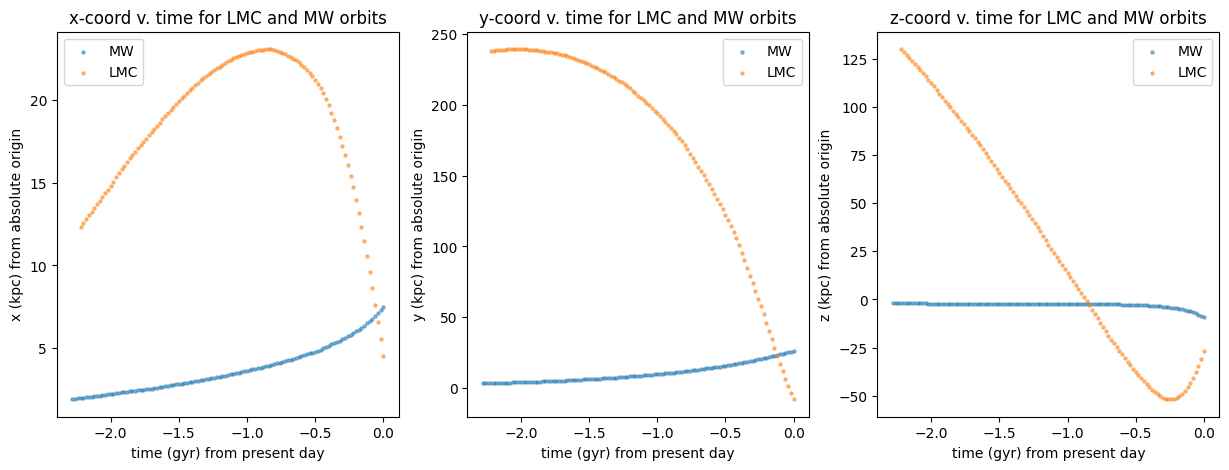

In [20]:
#subplots for x,y,z
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

#x
ax1.scatter(mw_df['time'], mw_df['x'], s=5, alpha=0.5, label='MW')
ax1.scatter(lmc_df['time'], lmc_df['x'], s=5, alpha=0.5, label='LMC')
ax1.set_title("x-coord v. time for LMC and MW orbits")
ax1.set_xlabel("time (gyr) from present day")
ax1.set_ylabel("x (kpc) from absolute origin")
ax1.legend()

#y
ax2.scatter(mw_df['time'], mw_df['y'], s=5, alpha=0.5, label='MW')
ax2.scatter(lmc_df['time'], lmc_df['y'], s=5, alpha=0.5, label='LMC')
ax2.set_title("y-coord v. time for LMC and MW orbits")
ax2.set_xlabel("time (gyr) from present day")
ax2.set_ylabel("y (kpc) from absolute origin")
ax2.legend()

#z
ax3.scatter(mw_df['time'], mw_df['z'], s=5, alpha=0.5, label='MW')
ax3.scatter(lmc_df['time'], lmc_df['z'], s=5, alpha=0.5, label='LMC')
ax3.set_title("z-coord v. time for LMC and MW orbits")
ax3.set_xlabel("time (gyr) from present day")
ax3.set_ylabel("z (kpc) from absolute origin")
ax3.legend()

plt.show()

In [35]:
# 3d plot of trajectory
# fig = plt.figure()
# ax = fig.add_subplot(111, projection="3d")

#parse data from files
x_lmc = y_lmc = z_lmc = []
x_mw = y_mw = z_mw = []

for index, row in lmc_df.iterrows():
    #print(row)
    x_lmc.append(row[1])
    y_lmc.append(row[2])
    z_lmc.append(row[3])

print(x_lmc)


[np.float64(12.294823234980347), np.float64(237.83738584542436), np.float64(129.9007910641392), np.float64(12.553456835690028), np.float64(238.0556533595995), np.float64(128.30990189874169), np.float64(12.799045896709284), np.float64(238.25582536974633), np.float64(126.75899935012067), np.float64(13.034069817101447), np.float64(238.43641195815832), np.float64(125.2346556719526), np.float64(13.26100799592986), np.float64(238.59592320712912), np.float64(123.72344311791372), np.float64(13.482339832257864), np.float64(238.73286919895216), np.float64(122.21193394168031), np.float64(13.7005447251488), np.float64(238.8457600159212), np.float64(120.68670039692874), np.float64(13.918102073666004), np.float64(238.93310574032944), np.float64(119.13431473733525), np.float64(14.137491276872824), np.float64(238.9934164544708), np.float64(117.54134921657617), np.float64(14.36119173383259), np.float64(239.02520224063852), np.float64(115.8943760883278), np.float64(14.591682843608648), np.float64(239.02

/tmp/ipykernel_3953/3193015177.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_lmc.append(row[1])
/tmp/ipykernel_3953/3193015177.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_lmc.append(row[2])
/tmp/ipykernel_3953/3193015177.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_lmc.append(row[3])
